### Group 5 - WorkGroup 5

* Daniel Carrillo
* Sonia Asto
* Elizabeth Linares

------------

In this workgroup we will use bootstraping tools and causal trees. For both analysis we use the Pennsylvania re-employment bonus experiment (penn_jae.dat in the data folder). You have to subset your data for tg== 4 | tg==0, so we are going to compare treatment group 4 and the control group.

# 1. Bootstraping 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

* **We load the data from our carpet**

In [2]:
## loading the data
Penn = pd.read_csv("../data/penn_jae.dat" , sep='\s', engine='python')
print(Penn.shape)
Penn

(13913, 24)


,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
2,10551,5,18,6,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,10831,5,27,27,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
13910,10817,4,4,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
13911,10691,0,27,27,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,NaN


* **Then, we select the treatment group 4 and the control group**

In [3]:
#Subsetting our data
data= Penn[ (Penn['tg'] == 4) | (Penn['tg'] == 0) ]
print(data.shape)

(5099, 24)


In [4]:
data['log_inuidur1'] = np.log( data["inuidur1"] )
data['T4']=(data[['tg']]==4).astype(int)
data

<ipython-input-4-7732a51a547e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_inuidur1'] = np.log( data["inuidur1"] )
<ipython-input-4-7732a51a547e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['T4']=(data[['tg']]==4).astype(int)


,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,T4
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,1,0,NaN,2.890372,0
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,0.000000,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,3.295837,0
11,10607,4,9,9,0,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,2.197225,1
12,10831,0,27,27,0,0,0,0,1,0,...,0,1,1,0,1,0,0,NaN,3.295837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13904,10628,4,10,10,0,0,1,0,0,0,...,1,0,0,0,0,0,1,NaN,2.302585,1
13905,10523,4,4,4,0,0,1,0,2,0,...,0,0,0,0,0,0,1,NaN,1.386294,1
13906,10558,0,9,9,0,0,0,0,2,0,...,1,0,0,0,1,0,0,NaN,2.197225,0
13910,10817,4,4,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,NaN,1.386294,1


In [5]:
n = data.shape[0]
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 13911
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abdt          5099 non-null   int64  
 1   tg            5099 non-null   int64  
 2   inuidur1      5099 non-null   int64  
 3   inuidur2      5099 non-null   int64  
 4   female        5099 non-null   int64  
 5   black         5099 non-null   int64  
 6   hispanic      5099 non-null   int64  
 7   othrace       5099 non-null   int64  
 8   dep           5099 non-null   int64  
 9   q1            5099 non-null   int64  
 10  q2            5099 non-null   int64  
 11  q3            5099 non-null   int64  
 12  q4            5099 non-null   int64  
 13  Unnamed: 13   5099 non-null   int64  
 14  q5            5099 non-null   int64  
 15  q6            5099 non-null   int64  
 16  recall        5099 non-null   int64  
 17  agelt35       5099 non-null   int64  
 18  agegt54       5099 non-null

* **Setting sample function**

We define a function called "sample" that will randomly select the data with replacement, i.e. each observation can be chosen more than once. This will form a sample of the same size as the original sample.

In [6]:
def sample(data,num_samples):
    return  np.random.choice(data.index, num_samples, replace=True)

In this example, we have 5099 indexes and we will randomly select 5099 indexes with replacement.

In [7]:
sample(data,5099)

array([ 5797, 10284,   828, ...,  5373,  5373,  6079], dtype=int64)

* **Setting get_estimates function**

We then define a function that will use the indices obtained from the previous function and the data to calculate the coefficient estimates of the following regression: 

* $log(inuidur1)$ ~ $T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)$

In [8]:
def get_estimates(data,index):
    X = data[['T4','female','black','othrace','dep','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']].loc[index]
    y = data['log_inuidur1'].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    coef = lr.coef_
    return [coef]

* **Setting bootstrapping function**

The last function we will define is the one that performs bootstrapping.  A loop is used so that the variables coeff_1, coeff_2, and coeff_3 store the results obtained from each sampling with replacement. Then the average value of the coefficients is taken. To finally return the coefficients of the variables of T4, female and black, as well as the standard error.

In [9]:
def boot(data,function,R):
    coeff_1 = []
    coeff_2 = []
    coeff_3 = []
    
    for i in range(R):
        coeff_1.append(function(data,sample(data,n))[0][0]) 
        coeff_2.append(function(data,sample(data,n))[0][1])
        coeff_3.append(function(data,sample(data,n))[0][2])
        
    coeff_1_sta = {'estimated_value':np.mean(coeff_1),'std_error':np.std(coeff_1)}   
    coeff_2_sta = {'estimated_value':np.mean(coeff_2),'std_error':np.std(coeff_2)}
    coeff_3_sta = {'estimated_value':np.mean(coeff_3),'std_error':np.std(coeff_3)}
    
    return {'coeff_1_statistics':coeff_1_sta,'coeff_2_statistics':coeff_2_sta,'coeff_3_statistics':coeff_3_sta}

* **Compute results**

Then, we will use all the functions created, as the main function to be used is the "boot" function, the arguments are the data used, the function that returns the estimated result ("get_estimates") and the number of bootstrap to be performed, which in this case is 1000.

In [10]:
results = boot(data,get_estimates,1000)
results

{'coeff_1_statistics': {'estimated_value': -0.07602265711814161,
  'std_error': 0.032546134530838725},
 'coeff_2_statistics': {'estimated_value': 0.13636736325344584,
  'std_error': 0.03545924145268484},
 'coeff_3_statistics': {'estimated_value': -0.3065549593859837,
  'std_error': 0.05948154132641773}}

* **Finally, we present the results in a table**

In [11]:
table = np.zeros((3, 2))
table[0,0] = results['coeff_1_statistics']['estimated_value']
table[1,0] = results['coeff_2_statistics']['estimated_value']
table[2,0] = results['coeff_3_statistics']['estimated_value']

table[0,1] = results['coeff_1_statistics']['std_error']
table[1,1] = results['coeff_2_statistics']['std_error']
table[2,1] = results['coeff_3_statistics']['std_error']

table = pd.DataFrame(table, columns = ["Estimate Value","Standard Error"], \
                      index = ["$T4$", "$Female$", "$Black$"])
table

,Estimate Value,Standard Error
$T4$,-0.076023,0.032546
$Female$,0.136367,0.035459
$Black$,-0.306555,0.059482


### **COMPARISON WITH OLS**

* **OLS Regression with intercept**

In [12]:
#Setting the variables
X = data[['T4','female','black','othrace','dep','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']]
y = data['log_inuidur1']

#Add constant
X = sm.add_constant(X)

#Regress
results_ols1 = sm.OLS(y,X).fit()

#Show results
print(results_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     13.34
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.06e-33
Time:                        15:08:42   Log-Likelihood:                -8128.2
No. Observations:                5099   AIC:                         1.629e+04
Df Residuals:                    5083   BIC:                         1.639e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7718      0.049     36.079      0.0

* **OLS Regression without intercept**

In [13]:
#Setting the variables
X = data[['T4','female','black','othrace','dep','q2','q3','q4','q5','q6','agelt35','agegt54','durable','lusd','husd']]
y = data['log_inuidur1']

#Regress
results_ols2 = sm.OLS(y,X).fit()

#Show results
print(results_ols2 .summary())

                                 OLS Regression Results                                
Dep. Variable:           log_inuidur1   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              723.0
Date:                Fri, 12 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:08:42   Log-Likelihood:                         -8709.5
No. Observations:                5099   AIC:                                  1.745e+04
Df Residuals:                    5084   BIC:                                  1.755e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* **Plot of the estimated coefficients with OLS and Bootstrapping**

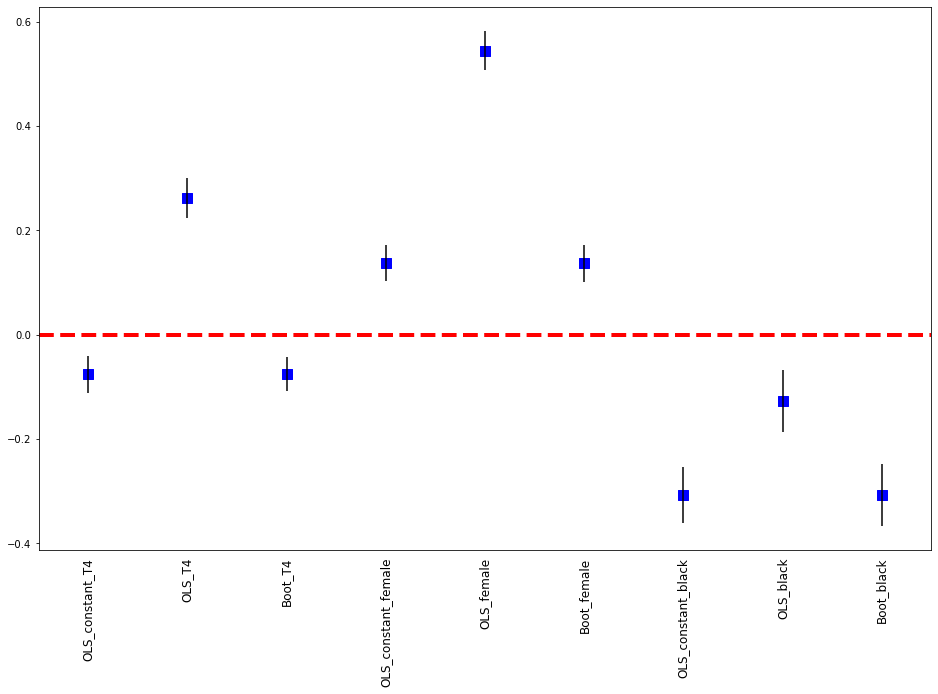

In [14]:
coef_ols1_T4 = results_ols1.summary2().tables[1]['Coef.']['T4']
err_ols1_T4 = results_ols1.summary2().tables[1]['Std.Err.']['T4']

coef_ols1_female = results_ols1.summary2().tables[1]['Coef.']['female']
err_ols1_female = results_ols1.summary2().tables[1]['Std.Err.']['female']

coef_ols1_black = results_ols1.summary2().tables[1]['Coef.']['black']
err_ols1_black = results_ols1.summary2().tables[1]['Std.Err.']['black']

coef_ols2_T4 = results_ols2.summary2().tables[1]['Coef.']['T4']
err_ols2_T4 = results_ols2.summary2().tables[1]['Std.Err.']['T4']

coef_ols2_female = results_ols2.summary2().tables[1]['Coef.']['female']
err_ols2_female = results_ols2.summary2().tables[1]['Std.Err.']['female']

coef_ols2_black = results_ols2.summary2().tables[1]['Coef.']['black']
err_ols2_black = results_ols2.summary2().tables[1]['Std.Err.']['black']

data_coef = pd.DataFrame({"variable":['OLS1_T4','OLS2_T4','B_T4','OLS1_female','OLS2_female','B_female','OL1_black', 'OLS2_black', 'B_black'],
                          "Estimate Value":[coef_ols1_T4 , coef_ols2_T4 , results['coeff_1_statistics']['estimated_value'] ,coef_ols1_female ,coef_ols2_female ,results['coeff_2_statistics']['estimated_value'] ,coef_ols1_black, coef_ols2_black, results['coeff_3_statistics']['estimated_value']],
                          "Std Error":[err_ols1_T4 ,err_ols2_T4 ,results['coeff_1_statistics']['std_error'], err_ols1_female ,err_ols2_female ,results['coeff_2_statistics']['std_error'],err_ols1_black, err_ols2_black, results['coeff_3_statistics']['std_error']] })

fig, ax = plt.subplots(figsize=(16, 10))
data_coef.plot(x='variable', y='Estimate Value', kind='bar', 
             ax=ax, color='none', 
             yerr='Std Error', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(data_coef.shape[0]), 
           marker='s', s=120, 
           y=data_coef['Estimate Value'], color='blue')
ax.axhline(y=0, linestyle='--', color='red', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['OLS_constant_T4','OLS_T4','Boot_T4','OLS_constant_female','OLS_female','Boot_female','OLS_constant_black', 'OLS_black', 'Boot_black'], 
                       rotation=90, fontsize=12)

plt.show()

In this graph, we can observe the following for all the variables analyzed: 

* The OLS regression, without intercept, using only the sample, is different from that obtained by Bootstrapping. 

* However, when estimating the model with intercept using OLS, we obtain a result similar to that obtained by Bootstrapping. 